<a href="https://colab.research.google.com/github/Devesh-DevCodes/NewsClassification/blob/main/NewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets


In [2]:
# Import libraries
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load dataset from HuggingFace
dataset = load_dataset("SetFit/bbc-news")

# Convert to DataFrame
df = pd.DataFrame(dataset['train'])
print(df.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


                                                text  label     label_text
0  wales want rugby league training wales could f...      2          sport
1  china aviation seeks rescue deal scandal-hit j...      1       business
2  rock band u2 break ticket record u2 have smash...      3  entertainment
3  markets signal brazilian recovery the brazilia...      1       business
4  tough rules for ringtone sellers firms that fl...      0           tech


In [4]:
# Preprocessing (Text Cleaning - basic)
import re

def clean_text(text):
    text = text.lower()                # Lowercase
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    return text.strip()

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)


In [5]:
X = df['clean_text']    # Input: News content
y = df['label']         # Output: Category ID


In [6]:
# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [8]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
#  Make Predictions
y_pred = model.predict(X_test)


In [10]:
# Evaluate the Model
# Print Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.85      0.95      0.90        41
           2       0.98      1.00      0.99        54
           3       1.00      0.93      0.97        46
           4       0.97      0.93      0.95        61

    accuracy                           0.95       245
   macro avg       0.95      0.95      0.95       245
weighted avg       0.95      0.95      0.95       245



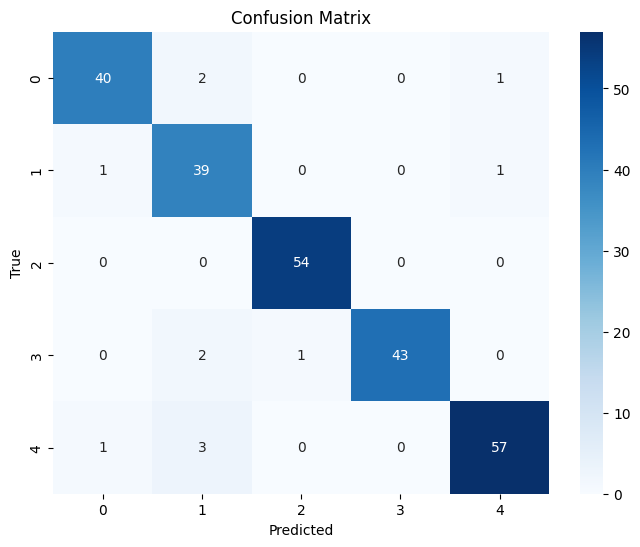

In [11]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Mapping labels to their text
label_mapping = dict(zip(df['label'], df['label_text']))


In [13]:
print(label_mapping)

{2: 'sport', 1: 'business', 3: 'entertainment', 0: 'tech', 4: 'politics'}


In [14]:
# Define a Function to Predict New News Text

def predict_category(news_text):
    # Step 1: Clean the text
    clean_news = clean_text(news_text)

    # Step 2: Vectorize the cleaned text
    news_vec = vectorizer.transform([clean_news])

    # Step 3: Predict using the trained model
    pred_label = model.predict(news_vec)[0]

    # Step 4: Map the label to category
    category = label_mapping[pred_label]

    return category


In [15]:
news_input = input("Enter your news text: ")

predicted_category = predict_category(news_input)

print(f"\nPredicted News Category: {predicted_category}")


Enter your news text: game

Predicted News Category: sport
